In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 300

In [225]:
df = pd.read_csv("application_train.csv")
df.shape

(307511, 122)

In [226]:
df_noissue = df[df.TARGET == 0]
df_issue = df[df.TARGET == 1]

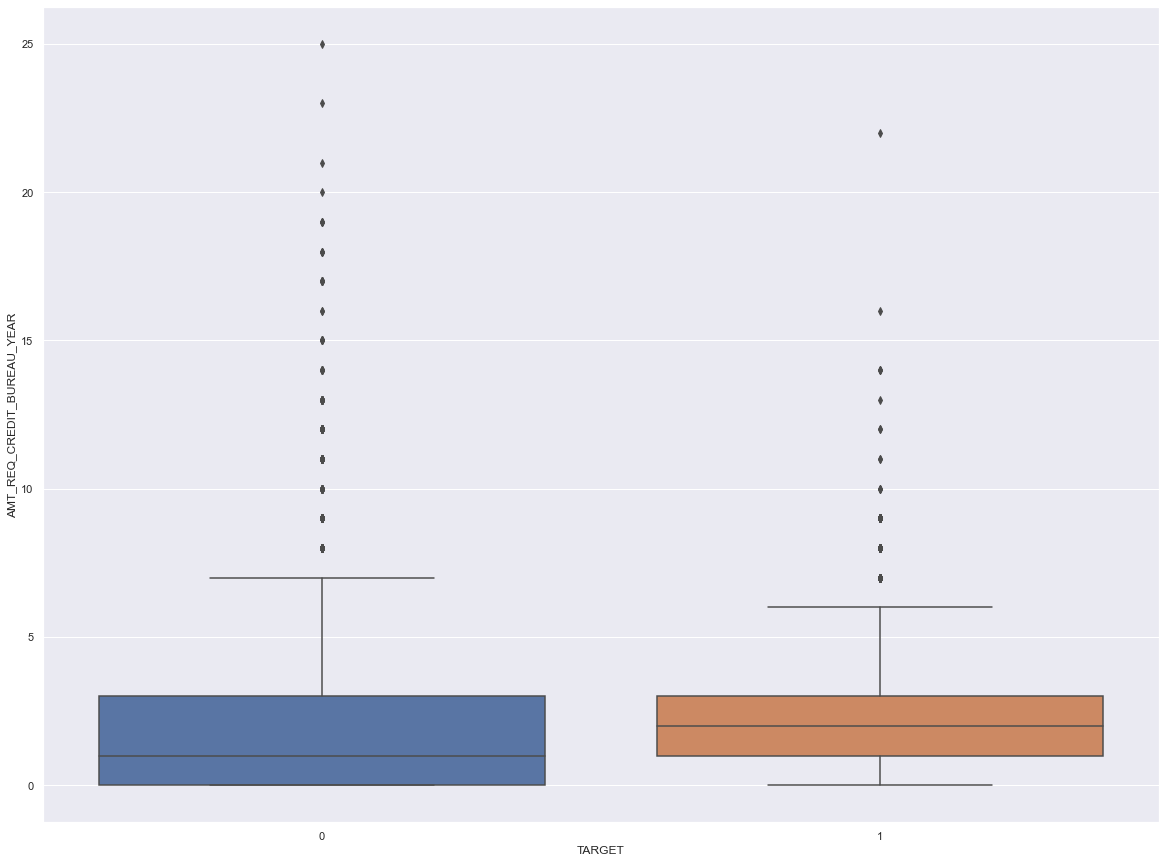

In [229]:
sns.boxplot(x = "TARGET" , y = "AMT_REQ_CREDIT_BUREAU_YEAR" ,data = df)
sns.set(rc = {'figure.figsize':(20,10)})

In [230]:
group = df.groupby(by = ["FLAG_DOCUMENT_6"]).TARGET.mean()*100
group

FLAG_DOCUMENT_6
0    8.314999
1    5.565404
Name: TARGET, dtype: float64

In [231]:
df["FLAG_DOCUMENT_6"].value_counts()

0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64

In [232]:
# Last Phone Change
df_noissue["DAYS_LAST_PHONE_CHANGE"].quantile(0.5)

-776.0

In [233]:
df_issue["DAYS_LAST_PHONE_CHANGE"].quantile(0.20)

-1514.0

In [234]:
df["DAYS_LAST_PHONE_CHANGE"] = df.DAYS_LAST_PHONE_CHANGE *-1

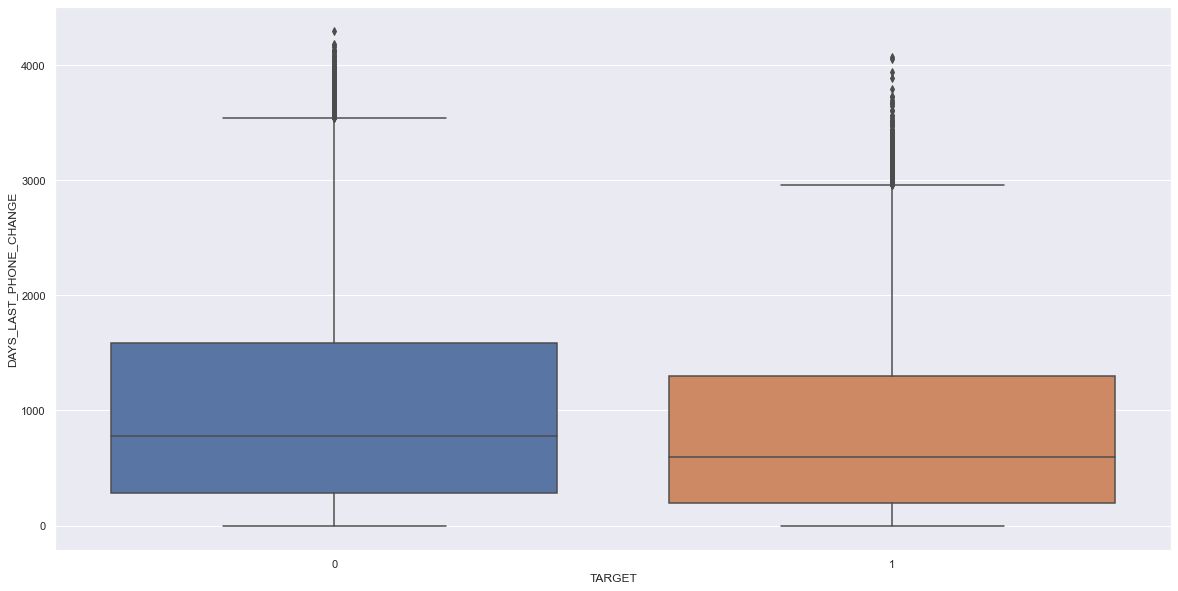

In [235]:
sns.boxplot(x = "TARGET" , y = "DAYS_LAST_PHONE_CHANGE" ,data = df)
sns.set(rc = {'figure.figsize':(20,10)})

In [236]:
df_issue.DEF_60_CNT_SOCIAL_CIRCLE.mean()

0.13824680301746742

In [237]:
df_noissue.DEF_60_CNT_SOCIAL_CIRCLE.mean()

0.09668762269214522

In [238]:
df["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [239]:
group = df.groupby(by = ["DEF_60_CNT_SOCIAL_CIRCLE"]).TARGET.mean()*100
group

DEF_60_CNT_SOCIAL_CIRCLE
0.0      7.834825
1.0     10.516918
2.0     12.145110
3.0     15.886288
4.0     11.111111
5.0     15.000000
6.0      0.000000
7.0      0.000000
24.0     0.000000
Name: TARGET, dtype: float64

In [240]:
group = df.groupby(by = ["EMERGENCYSTATE_MODE"]).TARGET.mean()*100
group

EMERGENCYSTATE_MODE
No     6.964900
Yes    9.579038
Name: TARGET, dtype: float64

In [241]:
df.EMERGENCYSTATE_MODE.value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [242]:
selected_columns= ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG' , "AMT_REQ_CREDIT_BUREAU_YEAR" , 
        "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_6" , "DAYS_LAST_PHONE_CHANGE" , "DEF_60_CNT_SOCIAL_CIRCLE",
        ]

In [243]:
final_df = df[selected_columns]

In [244]:
final_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...       ORGANIZATION_TYPE EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  \
0  ...  Business Entity Type 3     0.083037     0.262949     0.139376   
1  ...                  School     0.311267     0.622246          NaN   
2  ...              Government          NaN     0.555912     0.729567   
3  ...  Business Entity Type 3          NaN     0.650442          NaN   
4  ...                Religion          NaN     0.322738          NaN   

  APARTMENTS_AVG AMT_REQ_CREDIT_BUREAU_YEAR  FLAG_DOCUMENT_3  FLAG_DOCUMENT_6  \
0         0.0247                        1.0                1                0   
1         0.0959                        0.0                1                0   
2            NaN                        0.0                0                0   
3            NaN                        NaN                1                0   
4            NaN                        0.0                0                0   

   DAYS_LAST_PHONE_CHANGE  DEF_60_CNT_SOCIAL_CIRCLE  
0                  1134.0                       2.0  
1                   828.0                       0.0  
2                   815.0                       0.0  
3                   617.0                       0.0  
4                  1106.0                       0.0  

[5 rows x 36 columns]

# FEATURE ENGINEERING

In [245]:
df_issue = final_df[final_df.TARGET == 1]
df_noissue = final_df[final_df.TARGET == 0]

In [246]:
credit_income_ratio = final_df["AMT_CREDIT"]/final_df["AMT_INCOME_TOTAL"]
final_df["CREDIT_INCOME_RATIO"] = credit_income_ratio

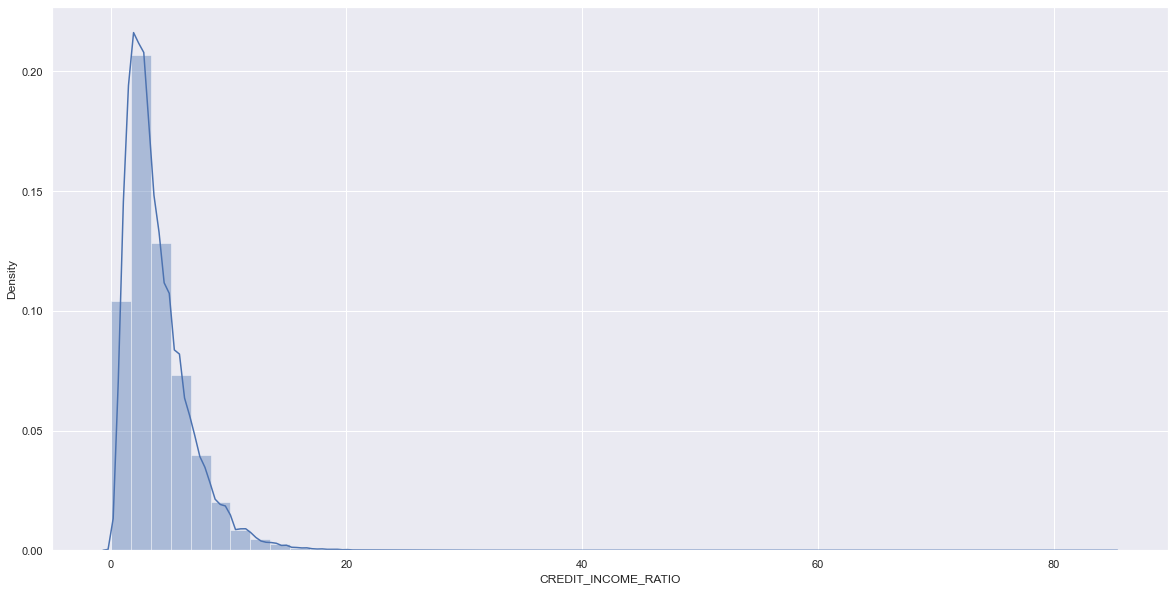

In [249]:
sns.distplot(final_df.CREDIT_INCOME_RATIO)
sns.set(rc = {'figure.figsize':(20,10)})

In [250]:
df["CREDIT_INCOME_MORE_THAN_95_PERCENT"] = final_df.CREDIT_INCOME_RATIO > final_df.CREDIT_INCOME_RATIO.quantile(0.95)
group = df.groupby(by = ["CREDIT_INCOME_MORE_THAN_95_PERCENT"]).TARGET.mean()*100
group

CREDIT_INCOME_MORE_THAN_95_PERCENT
False    8.138361
True     6.828824
Name: TARGET, dtype: float64

In [251]:
final_df["CREDIT_INCOME_MORE_THAN_95_PERCENT"] = df["CREDIT_INCOME_MORE_THAN_95_PERCENT"]

New Feature : 

In [252]:
df["income_annuity_ratio"] = df["AMT_INCOME_TOTAL"]/df["AMT_ANNUITY"]

<AxesSubplot:ylabel='Count'>

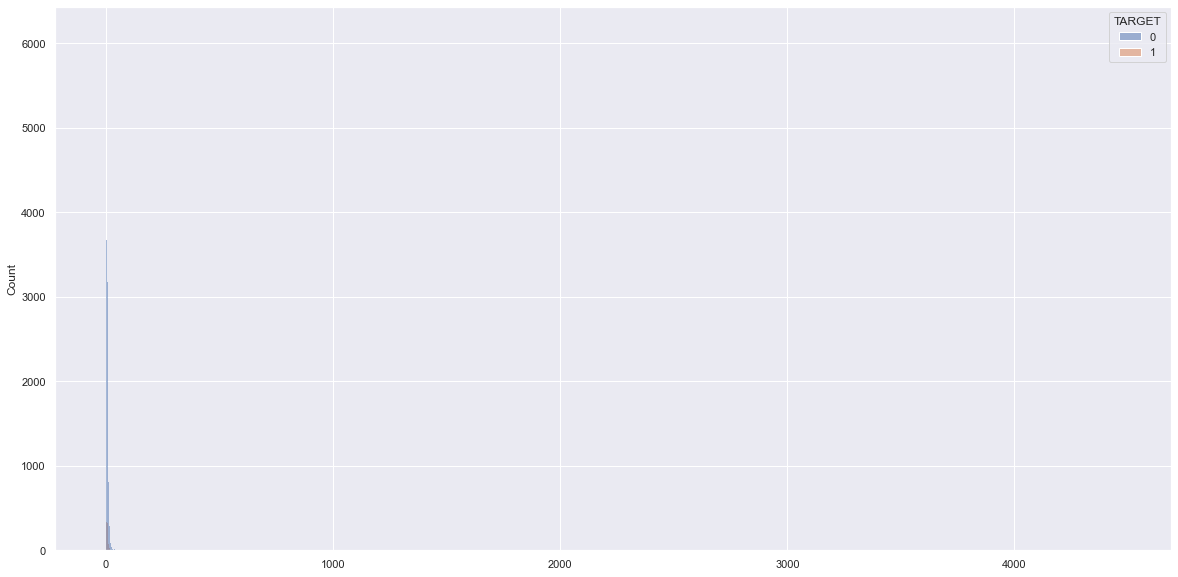

In [253]:
sns.histplot(data = df,x = income_annuity_ratio,hue = df["TARGET"])

In [254]:
final_df["INCOME_ANNUITY_RATIO"] = df.loc[:,"income_annuity_ratio"]

In [255]:
df_issue = df[df.TARGET == 1]
df_noissue = df[df.TARGET == 0]

In [256]:
df.income_annuity_ratio.max()

4466.5864971654355

In [257]:
df_noissue.income_annuity_ratio.quantile(0.9999)

93.82647401346145

In [258]:
df_issue.income_annuity_ratio.quantile(0.9999)

76.89966777407213

In [261]:
df["income_annuity_ratio_99_percent"] = final_df.CREDIT_INCOME_RATIO > final_df.CREDIT_INCOME_RATIO.quantile(0.9999)
group = df.groupby(by = ["income_annuity_ratio_99_percent"]).TARGET.mean()*100
group

income_annuity_ratio_99_percent
False     8.071393
True     23.333333
Name: TARGET, dtype: float64

In [262]:
df["income_annuity_ratio_99_percent"].max()

True

New Feature

In [263]:
df["CREDIT_ANNUITY_RATIO"] = df["AMT_CREDIT"]/df["AMT_ANNUITY"]
df.CREDIT_ANNUITY_RATIO.mean()

21.612322404361525

In [264]:
df[df.TARGET == 1].CREDIT_ANNUITY_RATIO.quantile(0.5)

20.0

In [265]:
df[df.TARGET == 0].CREDIT_ANNUITY_RATIO.quantile(0.5)

20.0

New Feature 

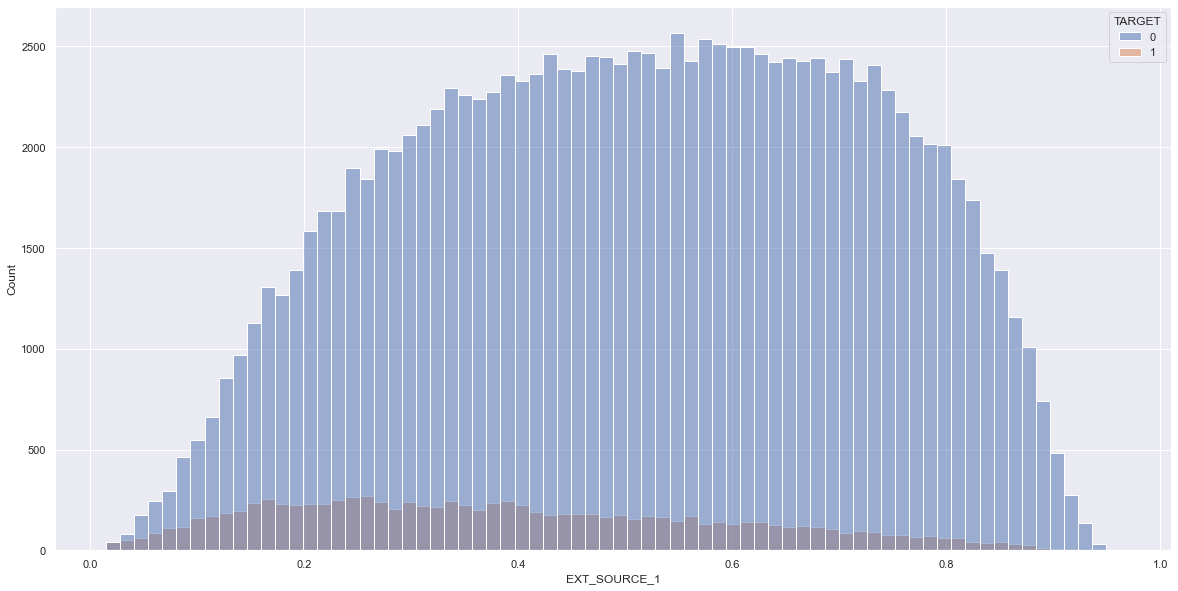

In [266]:
sns.histplot(data = df,x = df.EXT_SOURCE_1,hue = df["TARGET"])
sns.set(rc = {'figure.figsize':(20,15)})

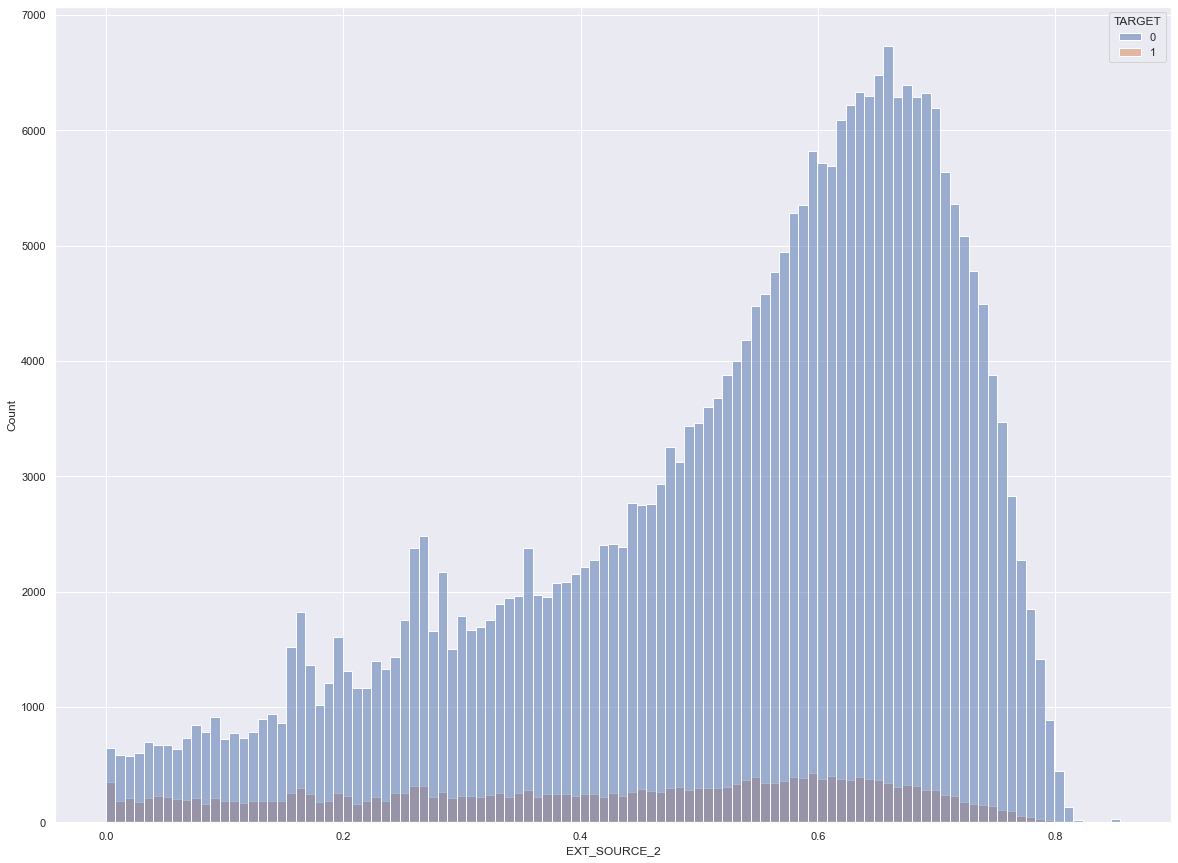

In [267]:
sns.histplot(data = df,x = df.EXT_SOURCE_2,hue = df["TARGET"])
sns.set(rc = {'figure.figsize':(20,15)})

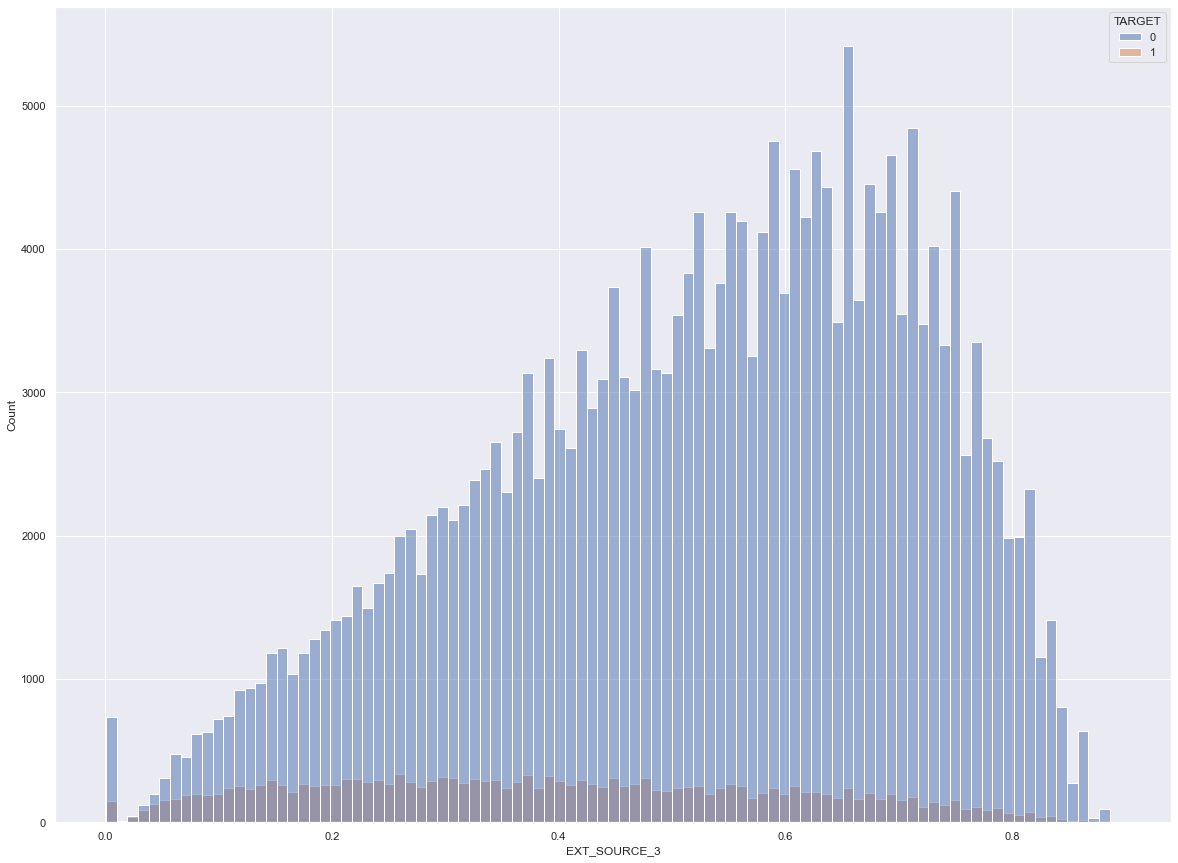

In [268]:
sns.histplot(data = df,x = df.EXT_SOURCE_3,hue = df["TARGET"])
sns.set(rc = {'figure.figsize':(20,15)})

In [269]:
df[df.TARGET==0]["EXT_SOURCE_2"].mean()

0.5234786690184261

In [270]:
print(df[df.TARGET==1]["EXT_SOURCE_3"].mean())
print(df[df.TARGET==0]["EXT_SOURCE_3"].mean())

0.39071659090048283
0.5209689589376003


In [271]:
final_df.isnull().sum()

SK_ID_CURR                                 0
TARGET                                     0
NAME_CONTRACT_TYPE                         0
CODE_GENDER                                0
FLAG_OWN_CAR                               0
FLAG_OWN_REALTY                            0
CNT_CHILDREN                               0
AMT_INCOME_TOTAL                           0
AMT_CREDIT                                 0
AMT_ANNUITY                               12
AMT_GOODS_PRICE                          278
NAME_TYPE_SUITE                         1292
NAME_INCOME_TYPE                           0
NAME_EDUCATION_TYPE                        0
NAME_FAMILY_STATUS                         0
NAME_HOUSING_TYPE                          0
REGION_POPULATION_RELATIVE                 0
DAYS_BIRTH                                 0
DAYS_EMPLOYED                              0
DAYS_REGISTRATION                          0
DAYS_ID_PUBLISH                            0
OWN_CAR_AGE                           202929
REGION_RAT

In [273]:
input_cols= [ 'SK_ID_CURR','NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', "AMT_REQ_CREDIT_BUREAU_YEAR", "FLAG_DOCUMENT_3" , "FLAG_DOCUMENT_6",
        "DAYS_LAST_PHONE_CHANGE" , "DEF_60_CNT_SOCIAL_CIRCLE" ,  "CREDIT_INCOME_RATIO", 
        "CREDIT_INCOME_MORE_THAN_95_PERCENT", "INCOME_ANNUITY_RATIO" ]

target_col = 'TARGET'

train_inputs = final_df[input_cols].copy()
train_targets = final_df[target_col].copy()

In [274]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [275]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [276]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')

imputer.fit(final_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [277]:
train_inputs = train_inputs.drop(["NAME_TYPE_SUITE"],axis=1)

In [278]:
train_inputs["TARGET"] = final_df["TARGET"]

In [283]:
train_inputs.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0    100002.0         Cash loans           M            N               Y   
1    100003.0         Cash loans           F            N               N   
2    100004.0    Revolving loans           M            Y               Y   
3    100006.0         Cash loans           F            N               Y   
4    100007.0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          202500.0    406597.5      24700.5         351000.0   
1           0.0          270000.0   1293502.5      35698.5        1129500.0   
2           0.0           67500.0    135000.0       6750.0         135000.0   
3           0.0          135000.0    312682.5      29686.5         297000.0   
4           0.0          121500.0    513000.0      21865.5         513000.0   

   ... APARTMENTS_AVG AMT_REQ_CREDIT_BUREAU_YEAR FLAG_DOCUMENT_3  \
0  ...        0.02470                   1.000000             1.0   
1  ...        0.09590                   0.000000             1.0   
2  ...        0.11744                   0.000000             0.0   
3  ...        0.11744                   1.899974             1.0   
4  ...        0.11744                   0.000000             0.0   

  FLAG_DOCUMENT_6  DAYS_LAST_PHONE_CHANGE  DEF_60_CNT_SOCIAL_CIRCLE  \
0             0.0                  1134.0                       2.0   
1             0.0                   828.0                       0.0   
2             0.0                   815.0                       0.0   
3             0.0                   617.0                       0.0   
4             0.0                  1106.0                       0.0   

   CREDIT_INCOME_RATIO  CREDIT_INCOME_MORE_THAN_95_PERCENT  \
0             2.007889                               False   
1             4.790750                               False   
2             2.000000                               False   
3             2.316167                               False   
4             4.222222                               False   

   INCOME_ANNUITY_RATIO  TARGET  
0              8.198215       1  
1              7.563343       0  
2             10.000000       0  
3              4.547522       0  
4              5.556699       0  

[5 rows x 38 columns]

In [284]:
train_inputs.to_csv("train.csv",index=False)

Application Train:
ORGANIZATION TYPE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_HOUSING_TYPE
CNT_CHILDREN
NAME_CONTRACT_TYPE
APARTMENTS_AVG
CREDIT_INCOME_RATIO

Graphs : Previous Loans
No of late days for last loan payment wrt TARGET
Amount of loan vs Interest Rate


Bureau:
DPD vs Target
Type of Loan Vs Target
Debt/Total Credit vs TARGET
% Active Loans VS DEBT